In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top','Trousers','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

train_images.shape

4422102/4422102 [==============================] - 1s 0us/step


(60000, 28, 28)

In [3]:
test_images.shape

(10000, 28, 28)

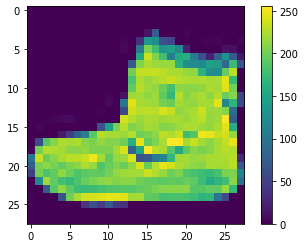

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [5]:
train_images = train_images/255.0
test_images = test_images/255.0

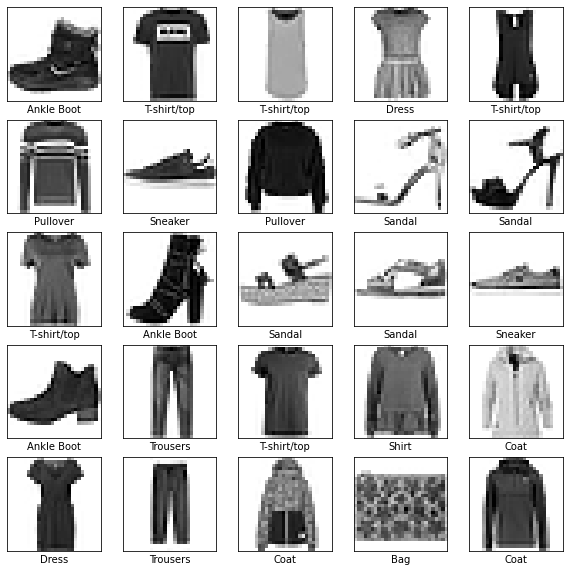

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [7]:
#budowa modelu sieci neuronowej
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [8]:

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4987 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3788 - accuracy: 0.8633
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3416 - accuracy: 0.8749
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3177 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2987 - accuracy: 0.8891
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2844 - accuracy: 0.8957
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2714 - accuracy: 0.8987
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2603 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2524 - accuracy: 0.9065
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.244

In [9]:
test_loss,test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f'test modelu -> loss: {test_loss}, accuracy: {test_acc}')

313/313 - 1s - loss: 0.3591 - accuracy: 0.8737 - 713ms/epoch - 2ms/step
test modelu -> loss: 0.3591364026069641, accuracy: 0.8737000226974487


In [10]:
probability_model = tf.keras.Sequential([
    model,
    tf.keras.layers.Softmax()
])

predictions = probability_model.predict(test_images)

predictions[0]

np.argmax(predictions[0])

test_labels[0]

313/313 [==============================] - 1s 2ms/step


9

In [12]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i],img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"
    plt.xlabel("{} {:2.0f}% ({})".format(
        class_names[predicted_label],
        100*np.max(predictions_array),
        class_names[true_label]
    ),
               color=color)

def plot_value_array(i,predictions_array,true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

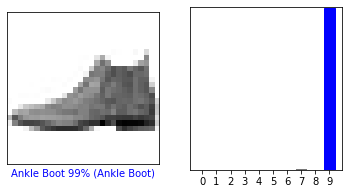

In [13]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

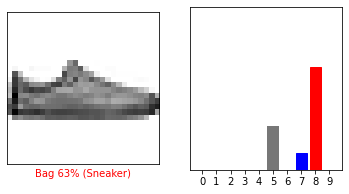

In [14]:

i=12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

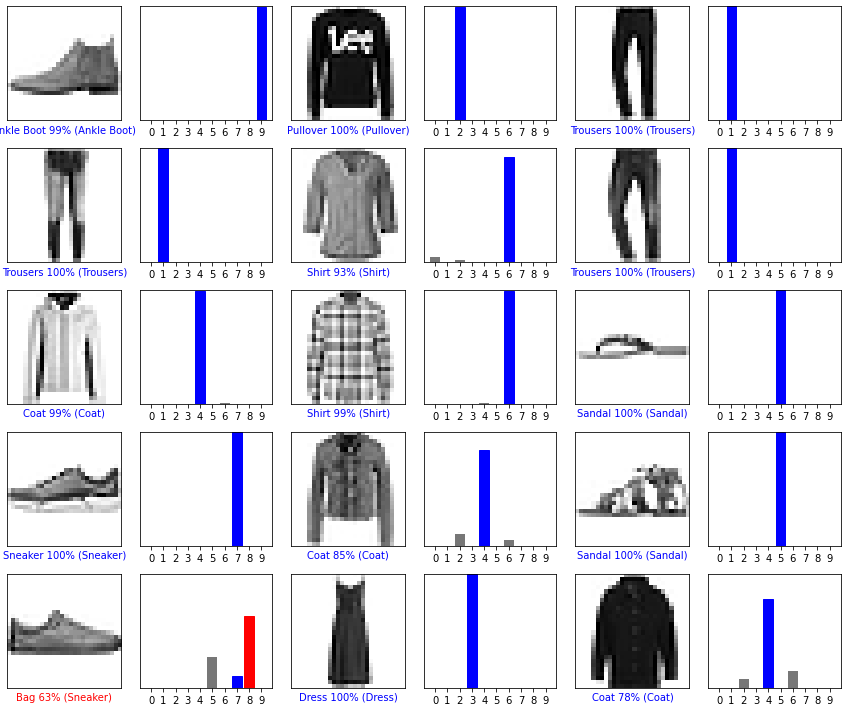

In [15]:

num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

(28, 28)
<class 'numpy.ndarray'>
(1, 28, 28)
1/1 [==============================] - 0s 21ms/step
[[4.2432998e-06 1.9028972e-13 9.9906129e-01 6.6844119e-10 3.8997759e-04
  4.9072907e-12 5.4452918e-04 9.2762381e-19 1.3453588e-11 4.0742843e-18]]


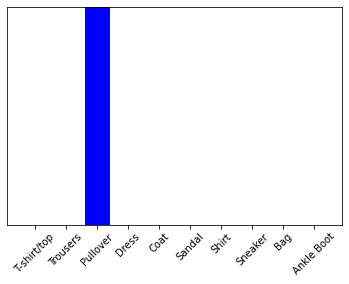

In [16]:
img = test_images[1]
print(img.shape)

img = (np.expand_dims(img,0))
print(type(img))
print(img.shape)

predictions_single = probability_model.predict(img)
print(predictions_single)

plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()